Port of Seattle Data

Vietnam Washington Trade Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import tools


In [2]:
folder_path = "C:/Users/miaca/OneDrive/Desktop/Vietnam Wash Proj"

In [17]:
importsAllPorts = ("ImportsAllPortsVietnam.csv") #Imports from vietnam to all ports in US
importsBothPorts = ("ImportsBothPortsVietnam.csv") #Imports from Vietnam to both seattle and sea-tac ports

CAimportsDf = tools.census_df("CA Imports from Vietnam.csv", True) #imports to Long Beach, LA and LAX ports
importsAllPortsDf = tools.census_df(importsAllPorts, True)
importsBothPortsDf = tools.census_df(importsBothPorts, True)
LongBeachDf = CAimportsDf.loc[CAimportsDf["Port"] == "Long Beach, CA (Port)"] #imports from Vietnam to Long Beach
LADf = CAimportsDf.loc[CAimportsDf["Port"] != "Long Beach, CA (Port)"]

mergedImportsBothPorts = tools.mergeLocations(importsBothPortsDf)
mergedLADf = tools.mergeLocations(LADf)

piv_importsBothPortsDf = tools.census_pivot(mergedImportsBothPorts)
piv_importsAllPortsDf = tools.census_pivot(importsAllPortsDf)
piv_LADf = tools.census_pivot(mergedLADf)
piv_LongBeachDf = tools.census_pivot(LongBeachDf)


Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Commodity,,,,,,,,,,,,,,,,,,,,,
01 Live Animals,0.403358,0.334225,0.350484,0.431755,0.531536,0.219651,0.526755,0.097033,0.051407,0.004194,...,0.005215,0.004911,0.010566,0.014197,0.010705,0.012527,0.013685,0.021430,0.009271,0.004097
02 Meat And Edible Meat Offal,0.076621,0.038397,0.047933,0.026369,0.015642,0.011802,0.000324,0.009850,0.000000,0.167152,...,0.000000,0.004372,0.024551,0.282779,0.098261,0.009117,0.158551,0.169096,0.127747,0.064362
"03 Fish, Crustaceans & Aquatic Invertebrates",28.942615,24.400158,21.503875,21.279437,23.015633,22.096968,19.338723,22.970046,24.183505,24.499165,...,23.666842,23.812898,24.017733,25.287360,17.055882,17.887505,28.938677,38.707078,20.267381,14.344390
04 Dairy Prods; Birds Eggs; Honey; Ed Animal Pr Nesoi,0.396070,0.370507,0.313956,0.669072,0.892169,0.683465,1.074475,0.408804,0.929935,1.394782,...,2.740531,0.974931,0.810806,0.845491,0.793218,1.040009,1.166853,0.440575,0.355537,0.423223
"05 Products Of Animal Origin, Nesoi",0.006102,0.014006,0.018698,0.011862,0.012156,0.018425,0.028943,0.012608,0.010067,0.006853,...,0.012991,0.021280,0.027265,0.163355,0.625174,1.997313,1.578369,2.634963,1.908807,0.862750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"94 Furnit;bedding,mattres;luminaires,light Fix;prefab",7.877360,16.561666,28.775398,36.779609,46.616987,47.891591,49.393856,61.717170,61.407724,72.197810,...,97.489252,94.280415,126.699484,123.309937,164.392956,253.891285,351.187728,331.566778,275.143239,231.214348
"95 Toys, Games & Sport Equipment; Parts & Accessories",0.740880,0.996299,1.988102,2.316577,3.411071,3.448061,5.423300,7.553602,8.528405,11.656732,...,15.546374,21.637187,28.283309,27.486760,32.252636,44.041437,63.272987,93.601729,77.959098,54.407302
96 Miscellaneous Manufactured Articles,0.123768,0.192718,0.269646,0.540779,0.598317,0.638880,0.640347,1.099121,1.533547,1.588999,...,1.524995,2.361768,3.627065,2.552471,2.260730,3.075699,3.854147,4.520695,3.385775,3.470061


I have imported and prepared 2 dataframes: the first is imports both ports, which contains all of the imports from vietnam to the port of seattle and the sea-tac port over the past 21 years. I also have importsallports which contains all of the imports from vietnam that entered any US port. Now, I will Create a total row, and then I will divide for percent of total imports

In [19]:
piv_importsBothPortsDf.loc["Total"] = piv_importsBothPortsDf.sum()
piv_importsAllPortsDf.loc["Total"] = piv_importsAllPortsDf.sum()
piv_LADf.loc["Total"] = piv_LADf.sum()
piv_LongBeachDf.loc["Total"] = piv_LongBeachDf.sum()

piv_LADf = tools.addTotalCol(piv_LADf)
piv_LongBeachDf= tools.addTotalCol(piv_LongBeachDf)
piv_importsBothPortsDf=tools.addTotalCol(piv_importsBothPortsDf)
piv_importsAllPortsDf = tools.addTotalCol(piv_importsAllPortsDf)




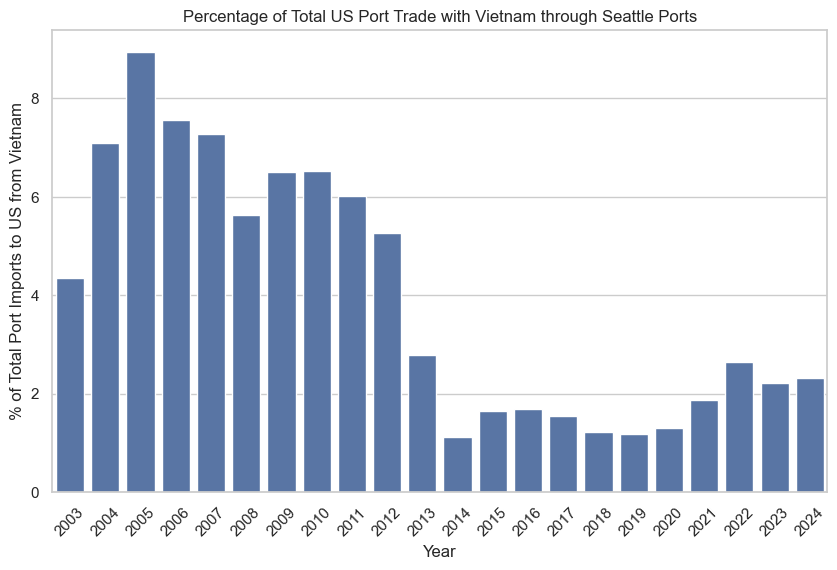

c:\Users\miaca\OneDrive\Desktop\Vietnam Wash Proj\tools.py:193: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot( x=series.index, y=series.values, palette='Blues')


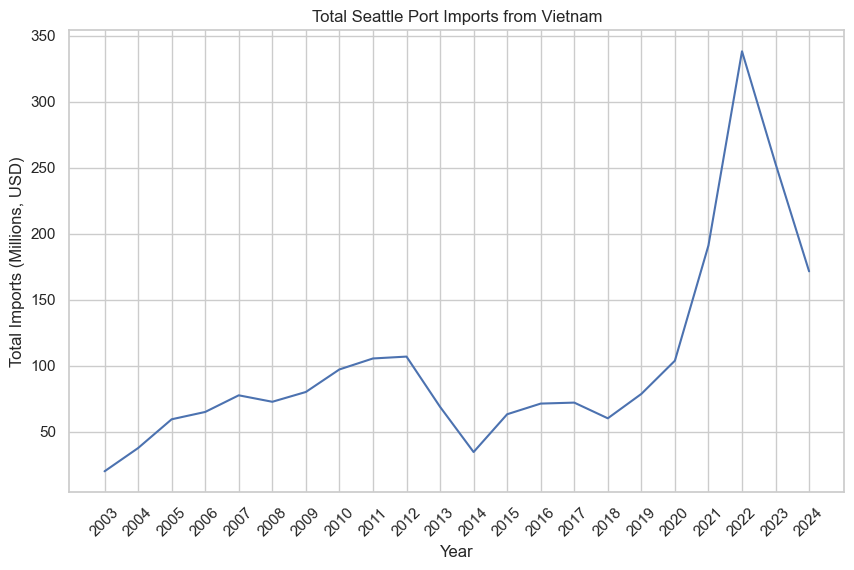

DataFrame saved to C:/Users/miaca/OneDrive/Desktop/Vietnam Wash Proj\percentofTotalVietnamTradeinSeattle.csv


In [21]:
pcts_df_Sea = tools.percentsDf_totalTrade(piv_importsBothPortsDf, piv_importsAllPortsDf)
pcts_df_LA = tools.percentsDf_totalTrade(piv_LADf, piv_importsAllPortsDf)
pcts_df_LongBeach = tools.percentsDf_totalTrade(piv_LongBeachDf, piv_importsAllPortsDf)
series = pcts_df_Sea.loc["Total"].iloc[:-1]

tools.plot_pcts_bargraph(series*100, "Percentage of Total US Port Trade with Vietnam through Seattle Ports", "Year", "% of Total Port Imports to US from Vietnam", "pctTotalUSPortTradeThroughSeattle", folder_path)
tools.plot_pcts_linegraph(piv_importsBothPortsDf.loc["Total"].iloc[:-1], "Total Seattle Port Imports from Vietnam", "Year", "Total Imports (Millions, USD)", "TotalSeattlePortTrade", folder_path)
tools.save_csv(pcts_df_Sea, "percentofTotalVietnamTradeinSeattle", folder_path)


In [23]:
pcts_la=pcts_df_LA.loc["Total"].iloc[:-1]*100
pcts_lb=pcts_df_LongBeach.loc["Total"].iloc[:-1]*100
pcts_series_seattle= pcts_df_Sea.loc["Total"].iloc[:-1]*100
mergeddf = pd.DataFrame({
    'Los Angeles': pcts_la,
    'Long Beach': pcts_lb,
    'Seattle': pcts_series_seattle
})
tools.plot_stacked_bargraph(mergeddf)







AttributeError: module 'tools' has no attribute 'plot_stacked_bargraph'

Now I'd like to make a stacked barchart. Lets try

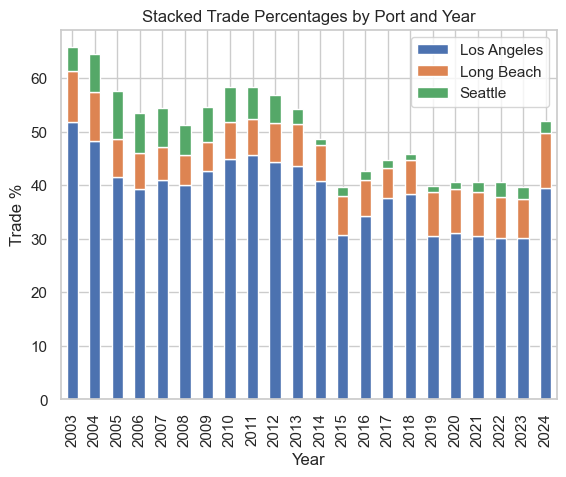

In [8]:


#tools.plot_pcts_bargraph(pcts_df_LA.loc["Total"].iloc[:-1]*100, "Total LA Port Imports from Vietnam","Year", "% of total US port Imports from Vietnam", "LAImportPcts", folder_path)
#tools.plot_pcts_bargraph(pcts_df_LongBeach.loc["Total"].iloc[:-1]*100, "Percent of US imports from Vietnam to Long Beach", "Year", "% of total US port Imports from Vietnam",  "LongbeachPcts", folder_path)
#tools.plot_pcts_linegraph(piv_LADf.loc["Total"].iloc[:-1], "Total LA Port Imports from Vietnam", "Year", "Total Imports (Millions, USD)", "TotalLAPortTrade", folder_path)
#tools.plot_pcts_linegraph(piv_LongBeachDf.loc["Total"].iloc[:-1], "Total Long Beach port Imports from Vietnam", "Year", "Total Imports (Millions, USD)", "TotalLongBeachPortImports", folder_path)


# Add labels and title


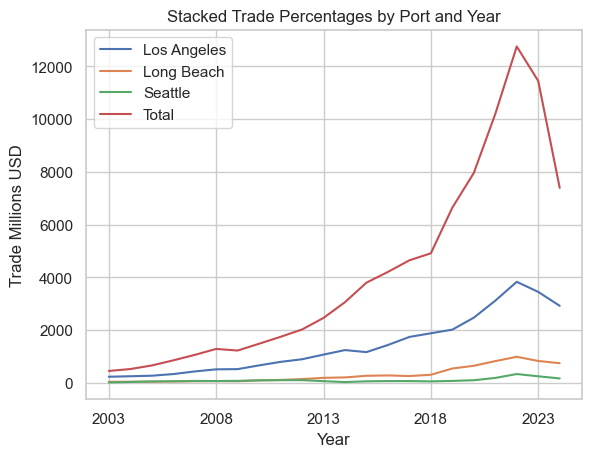

,Los Angeles,Long Beach,Seattle,Total
Time,,,,
2003,235.839569,43.872393,19.814986,455.483769
2004,254.660437,48.474836,37.452152,527.529342
2005,274.739060,47.650204,59.264024,663.115873
2006,336.909932,56.476313,64.824787,856.666350
2007,436.485764,65.152411,77.440415,1063.281953
2008,516.897123,71.554467,72.537480,1290.109789
2009,524.298394,65.560378,79.969406,1228.781647
2010,666.854826,102.774186,97.056051,1486.785564
2011,799.526846,114.759747,105.380040,1748.784023


In [9]:
mergeddf = pd.DataFrame({'Los Angeles':piv_LADf.loc["Total"].iloc[:-1],
                         'Long Beach': piv_LongBeachDf.loc["Total"].iloc[:-1],
                         'Seattle': piv_importsBothPortsDf.loc["Total"].iloc[:-1],
                         'Total':piv_importsAllPortsDf.loc["Total"].iloc[:-1]
})
ax = mergeddf.plot(kind='line')
ax.set_xlabel('Year')
ax.set_ylabel('Trade Millions USD')
ax.set_title('Stacked Trade Percentages by Port and Year')

# Show the plot
plt.savefig(os.path.join(folder_path, "allVietnamPortImports.png"))
plt.show()
mergeddf

In [10]:
df_all_port_totals = pd.read_csv("Port-level Imports (13).csv")
num_locations = df_all_port_totals['Port'].nunique()
df_all_port_totals["Customs Value (Gen) ($US)"] = df_all_port_totals["Customs Value (Gen) ($US)"].astype(str).str.replace(',', '').astype(float)
pivot_df = df_all_port_totals.pivot(index='Port', columns='Time', values="Customs Value (Gen) ($US)")
pivot_df.fillna(0)
pivot_df.rename(columns={"2024 through August":2024}, inplace=True)
pivot_df.fillna(0, inplace=True)

In [13]:

pivot_df1 = tools.addTotalCol(pivot_df)
pivot_df1


Time,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
Port,,,,,,,,,,,,,,,,,,,,,
"Aberdeen-Hoquiam, WA (Port)",0.0,13466.0,0.0,0.0,0.0,0.0,0.0,0.0,130348.0,0.0,...,56544.0,0.0,48933.0,44960.0,25487.0,17950.0,32429.0,114002.0,31424.0,515543.0
"Addison Airport, Dallas, TX (Port)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26901.0,0.0,0.0,34794.0
"Aguadilla, PR (Port)",0.0,0.0,0.0,0.0,0.0,0.0,1482.0,0.0,0.0,6073.0,...,32474.0,32467.0,303333.0,37589.0,1664650.0,18449.0,98867.0,207649.0,2042159.0,4462959.0
"Alameda, CA (Port)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29661.0
"Albany, NY (Port)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0,0.0,0.0,...,361140.0,42483.0,8293329.0,0.0,24317.0,52746.0,216254.0,510259.0,170613.0,9679156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilmington, DE (Port)",30599.0,0.0,0.0,0.0,0.0,0.0,0.0,81138.0,240750.0,2872.0,...,7746472.0,0.0,2970.0,7276.0,0.0,80345.0,28405.0,61590.0,0.0,8282417.0
"Wilmington, NC (Port)",8127197.0,10425882.0,25409558.0,27415976.0,30860397.0,33041381.0,19141443.0,37812863.0,34903795.0,37643471.0,...,41468337.0,19306120.0,47390760.0,30342983.0,82361015.0,51206318.0,50770069.0,64323590.0,38112285.0,774219975.0
"Winston-Salem, NC (Port)",41828.0,0.0,0.0,0.0,21671.0,0.0,0.0,1382.0,0.0,6486.0,...,148573.0,133185.0,639209.0,978187.0,6017320.0,8687706.0,4714766.0,224367.0,21369.0,22093513.0


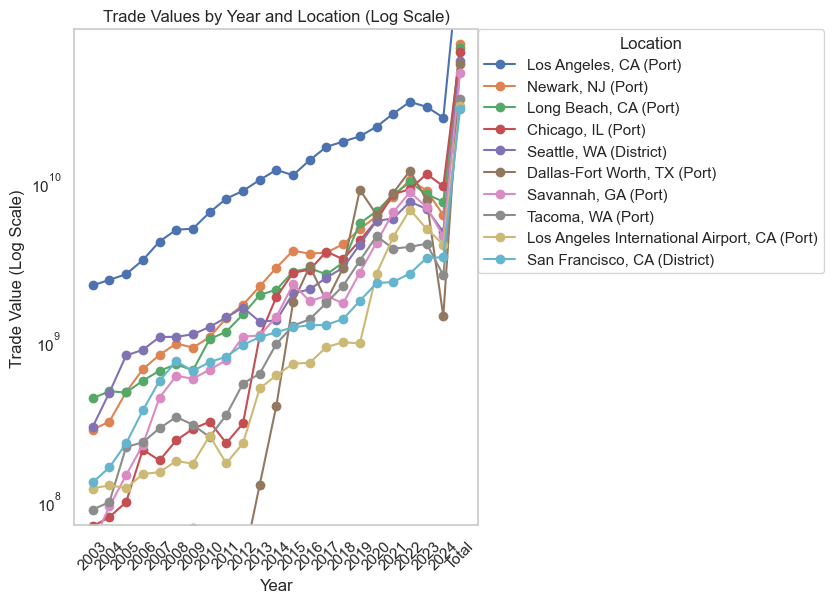

In [14]:
pivot_df1.sort_values(by= "Total", ascending=False).head(20)
df2 = pivot_df1
data = df2.sort_values(by= "Total", ascending=False).head(10)
transposed_df = data.T
plt.figure(figsize=(10, 6))
transposed_df.index = transposed_df.index.astype(str)
for location in transposed_df.columns:
    plt.plot(transposed_df.index, transposed_df[location], marker='o', label=location)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Trade Value (Log Scale)')
plt.ylim(70000000, 90000000000)
plt.title('Trade Values by Year and Location (Log Scale)')
plt.legend(title='Location', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)
plt.grid()
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Rotate x-ticks for better visibility
# Adjust layout for better spacing

plt.xticks(rotation=45)
# Show the plot
plt.savefig(os.path.join(folder_path, "allVietnamPortImports.png"))
plt.show()

In [30]:
newwark= df2.loc["Newark, NJ (Port)"]

newwark_int = newwark.astype(int)
allimps = piv_importsAllPortsDf.loc["Total"].iloc[:-1]
newwark_int, allimps


(Time
 2003      278466706
 2004      313243285
 2005      478811591
 2006      666659953
 2007      819754087
 2008      965549185
 2009      911739284
 2010     1057521790
 2011     1394554633
 2012     1689388021
 2013    -2147483648
 2014    -2147483648
 2015    -2147483648
 2016    -2147483648
 2017    -2147483648
 2018    -2147483648
 2019    -2147483648
 2020    -2147483648
 2021    -2147483648
 2022    -2147483648
 2023    -2147483648
 2024    -2147483648
 Total   -2147483648
 Name: Newark, NJ (Port), dtype: int32,
 Time
 2003      455.483769
 2004      527.529342
 2005      663.115873
 2006      856.666350
 2007     1063.281953
 2008     1290.109789
 2009     1228.781647
 2010     1486.785564
 2011     1748.784023
 2012     2026.767697
 2013     2465.103588
 2014     3061.765040
 2015     3801.492907
 2016     4208.545480
 2017     4647.736949
 2018     4913.946616
 2019     6643.733857
 2020     7958.234910
 2021    10193.893263
 2022    12751.190366
 2023    11442.607608
 20